### Approach

To tackle the shape detection problem, I initially tried to use YOLO (You Only Look Once) for detecting the elephant and then extracting its edges. However, this method was complicated and time-consuming. After reconsidering the approach and reviewing simpler methods, I switched to using traditional image processing techniques. This involves:

1. **Loading and Preprocessing**: Read the image, convert it to grayscale, and apply Gaussian blur to smooth out the noise.
2. **Edge Detection**: Use Canny edge detection to highlight the edges of the shapes.
3. **Finding and Filtering Contours**: Extract contours from the edges and filter them based on size and shape to identify the target shape.
4. **Drawing and Displaying Results**: Draw the filtered contours on a blank image and display the results.

### Note

It took me approximately 3-4 hours to complete this because my initial approach was to use YOLO to detect the elephant shape and then extract its edges. This method turned out to be complex and not very effective. After reevaluating my strategy and considering the instructions about HARD-CODING, I switched to this approach. The traditional method is more straightforward and better suited for this problem, making it easier to handle and faster to implement.

### Observation

The current method struggles to detect shapes when they are connected or overlapped. This happens because the contours of overlapping shapes become irregular and larger, which might exceed the number of vertices used for filtering. Specifically, the number of edges can become too high, complicating the detection process and making it difficult to accurately isolate and identify individual shapes.


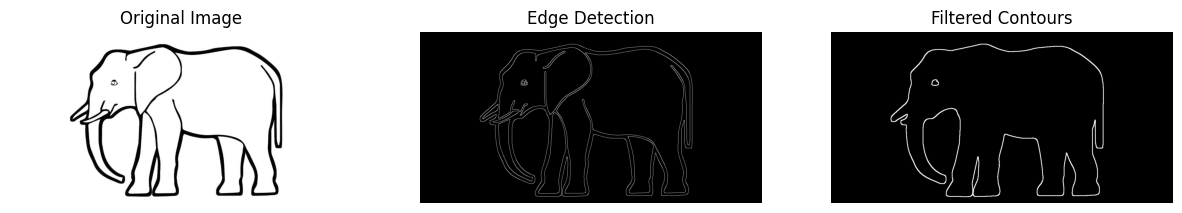

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    # 1. Load Image
    image = cv2.imread(image_path)
    
    # 2. Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 3. Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 4. Edge Detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # 5. Find Contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 6. Filter Contours
    filtered_contours = []
    for cnt in contours:
        if cv2.contourArea(cnt) > 400:  # Filter by area
            perimeter = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)
            if len(approx) > 8:  # Filter by shape
                filtered_contours.append(cnt)
    
    # 7. Draw Contours
    contour_image = np.zeros_like(image)
    cv2.drawContours(contour_image, filtered_contours, -1, (255, 255, 255), 2)
    
    # 8. Convert for Display
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
    
    # 9. Display Results
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image_rgb)
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title('Edge Detection')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title('Filtered Contours')
    plt.imshow(contour_image_rgb)
    plt.axis('off')
    
    plt.show()

# Example usage
process_image('img1.jpg')


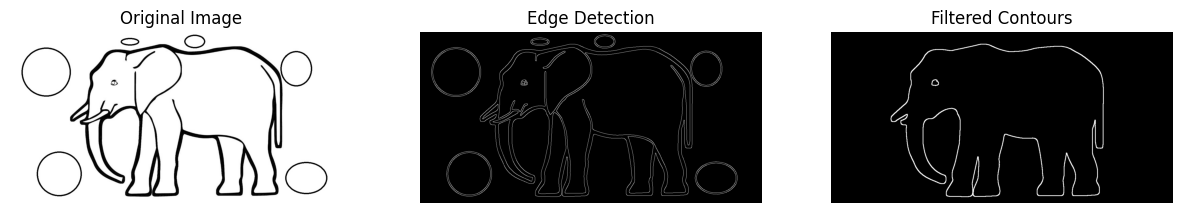

In [78]:
process_image('img2.jpg')

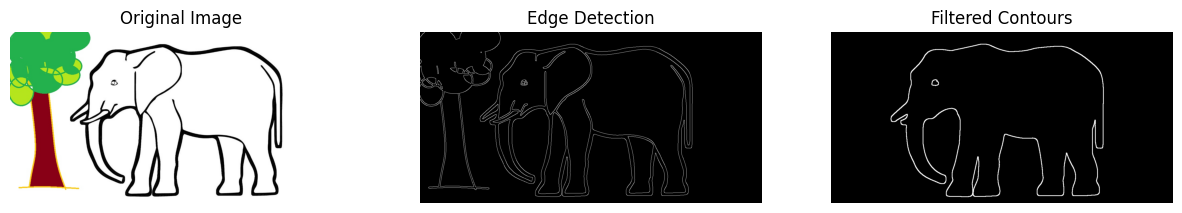

In [79]:
process_image('img3.jpg')

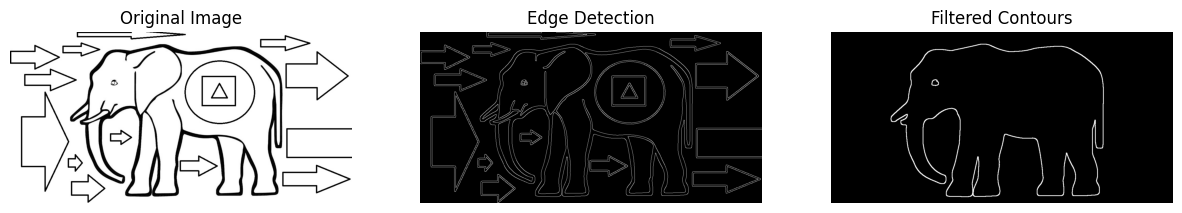

In [80]:
process_image('img5.jpg')

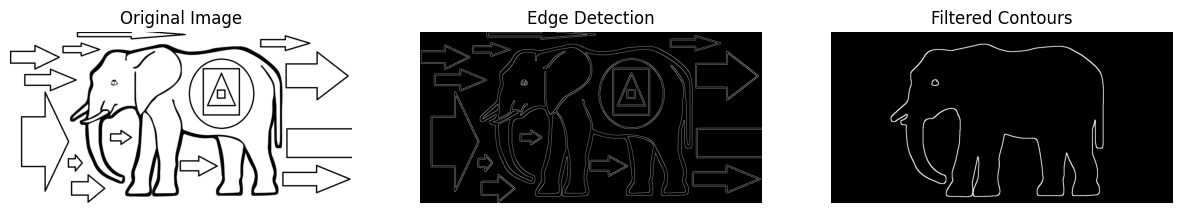

In [81]:
process_image('img6.jpg')

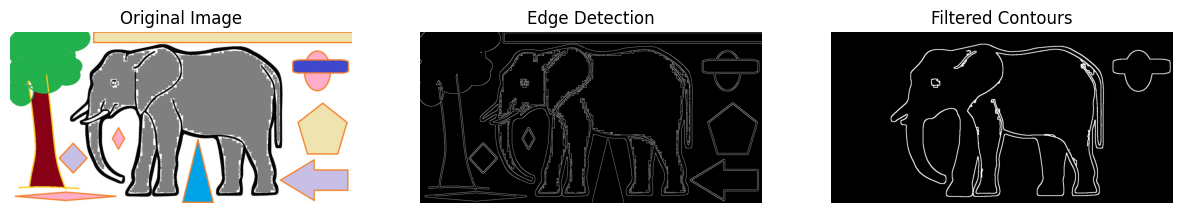

In [82]:
process_image('img8.jpg')

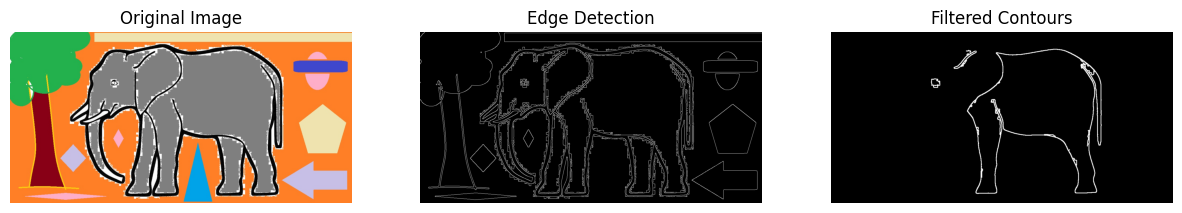

In [83]:
process_image('img7.jpg')

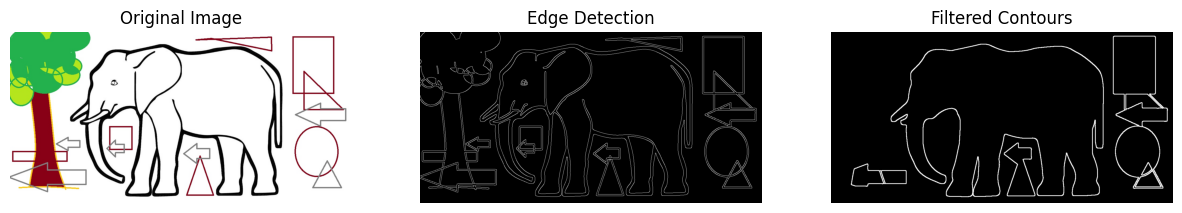

In [63]:
process_image('img4.jpg')